In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk as nl
#nl.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import sys,csv,re

In [2]:
df = pd.read_csv("kindle_reviews.csv")

df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [3]:
df.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [4]:
df['reviewText'] = df['reviewText'] + ' ' + df['summary']
#del df['summary']

In [5]:
df['reviewText'].fillna("",inplace = True)

In [6]:
df.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText           0
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      982619 non-null  int64 
 1   asin            982619 non-null  object
 2   helpful         982619 non-null  object
 3   overall         982619 non-null  int64 
 4   reviewText      982619 non-null  object
 5   reviewTime      982619 non-null  object
 6   reviewerID      982619 non-null  object
 7   reviewerName    978803 non-null  object
 8   summary         982618 non-null  object
 9   unixReviewTime  982619 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 75.0+ MB


In [9]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [10]:
# LowerCase
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [11]:
# Remove Punctuation
df['reviewText_punctuation'] = df['reviewText'].str.replace('[^\w\s]','')
df.head()

C:\Users\lodor\AppData\Local\Temp/ipykernel_14968/3807438759.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText_punctuation'] = df['reviewText'].str.replace('[^\w\s]','')


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewText_punctuation
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,i enjoy vintage books and movies so i enjoyed ...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,this book is a reissue of an old one the autho...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,this was a fairly interesting read it had old ...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,id never read any of the amy brewster mysterie...
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,if you like period pieces clothing lingo you ...


In [12]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop = stopwords.words('english')
new_stop = ["read","book","really","cant wait","however","instead","rather","sex scene","work","also","name","could put",
           "yet","could put","name","actually","wait see","show","im glad","said","ye","im sure","maybe","sex scene",
           "even though","couldnt put","forward next","one thing","one another","mother","next one","idea","wait see",
           "sort","year old","although","course","next one","im sure","story","one","like","situation","case","saw","talk",
           "even though","couldnt put","went","seem","sex  scene","could put","meet","sometime","set","almost","either","yes",
           "told","begin","least","especially","problem","shows","even","wait next",""]

stop.extend(new_stop)

df['reviewText_stop']  = df['reviewText_punctuation'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewText_punctuation,reviewText_stop
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading plo...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,this book is a reissue of an old one the autho...,reissue old author born 1910 era say nero wolf...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,this was a fairly interesting read it had old ...,fairly interesting old style terminologyi glad...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,id never read any of the amy brewster mysterie...,id never amy brewster mysteries hooked liked
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,if you like period pieces clothing lingo you ...,period pieces clothing lingo enjoy mystery aut...


In [20]:
# import wordcloud library
from wordcloud import WordCloud

# create a single string of space separated words
unique_string=(" ").join(list(df['reviews'].values))

# create the word cloud and save to file
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
wordcloud.to_file("word_cloud.png")

TypeError: sequence item 0: expected str instance, list found

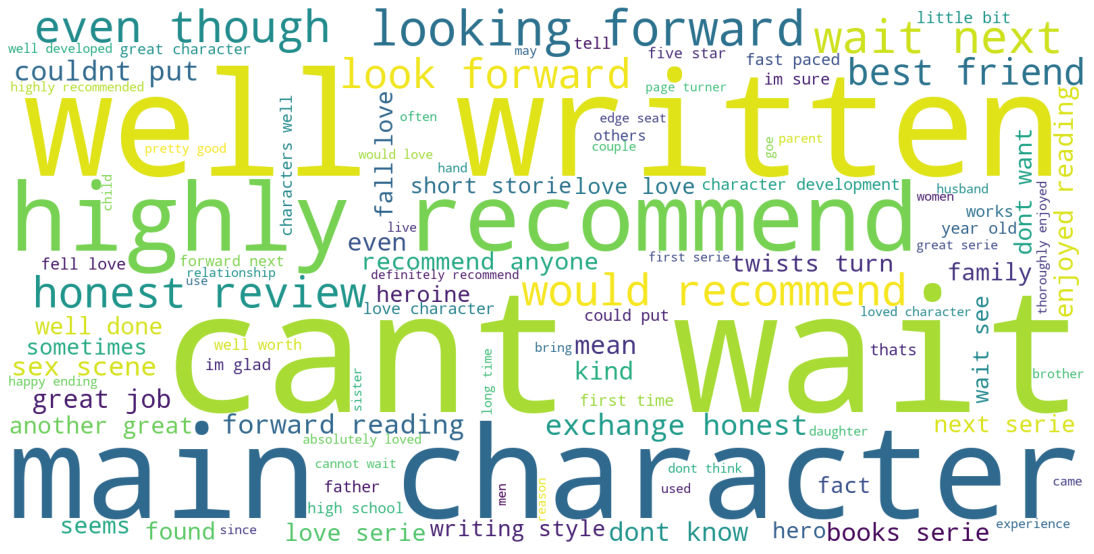

In [67]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ' '.join(list(df['reviewText_stop'].values))

# Create a WordCloud object
wordcloud = WordCloud(max_words=50,
  width = 100, height = 500,
                background_color ='white',
                #colormap='tab20',
                stopwords = stop,
                min_font_size = 10).generate(long_string)

# Visualize the word cloud
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [16]:
#Tokenization 
import textblob           
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text
df['reviewText_tokenized'] = df['reviewText_stop'].apply(lambda x: tokenization(x.lower()))

In [17]:
#Lemmatization

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['reviewText_lemmatized'] = df['reviewText_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,reviewText_punctuation,reviewText_stop,reviewText_tokenized,reviewText_lemmatized
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading plo...,"[enjoy, vintage, books, movies, enjoyed, readi...","[enjoy, vintage, book, movie, enjoyed, reading..."
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,this book is a reissue of an old one the autho...,reissue old author born 1910 era say nero wolf...,"[reissue, old, author, born, 1910, era, say, n...","[reissue, old, author, born, 1910, era, say, n..."
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,this was a fairly interesting read it had old ...,fairly interesting old style terminologyi glad...,"[fairly, interesting, old, style, terminologyi...","[fairly, interesting, old, style, terminologyi..."
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,id never read any of the amy brewster mysterie...,id never amy brewster mysteries hooked liked,"[id, never, amy, brewster, mysteries, hooked, ...","[id, never, amy, brewster, mystery, hooked, li..."
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,if you like period pieces clothing lingo you ...,period pieces clothing lingo enjoy mystery aut...,"[period, pieces, clothing, lingo, enjoy, myste...","[period, piece, clothing, lingo, enjoy, myster..."


In [21]:
# function to plot most frequent terms
import nltk
from nltk import FreqDist

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

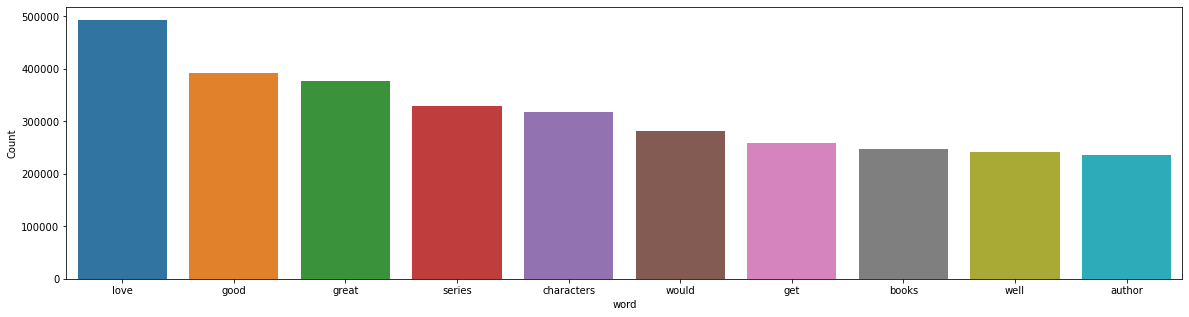

In [22]:
freq_words(df['reviewText_stop'], 10)

In [23]:
df['reviewText_lemmatized']

0         [enjoy, vintage, book, movie, enjoyed, reading...
1         [reissue, old, author, born, 1910, era, say, n...
2         [fairly, interesting, old, style, terminologyi...
3         [id, never, amy, brewster, mystery, hooked, li...
4         [period, piece, clothing, lingo, enjoy, myster...
                                ...                        
982614    [yasss, hunny, great, dre, mess, cherika, refu...
982615    [enjoyed, beginning, end, far, lex, hoe, sneak...
982616    [great, cherika, fool, let, man, get, away, mu...
982617    [say, excellent, please, believe, definitely, ...
982618    [everything, hope, alexus, wise, move, lawd, t...
Name: reviewText_lemmatized, Length: 982619, dtype: object

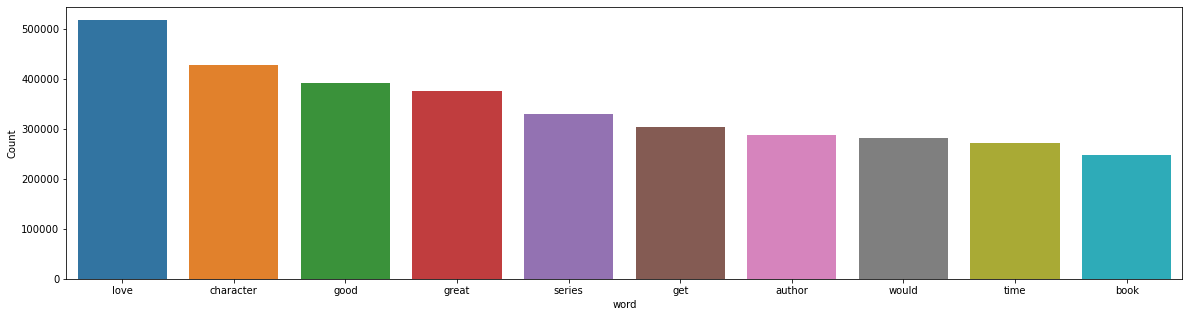

In [24]:
words = []
for i in range(len(df['reviewText_lemmatized'])):
    words.append(' '.join(df['reviewText_lemmatized'][i]))

df['reviews'] = words

freq_words(df['reviews'], 10)

In [21]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,reviewText_punctuation,reviewText_stop,reviewText_tokenized,reviewText_lemmatized,reviews
0,0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading plo...,"[enjoy, vintage, books, movies, enjoyed, readi...","[enjoy, vintage, book, movie, enjoyed, reading...",enjoy vintage book movie enjoyed reading plot ...
1,1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,this book is a reissue of an old one the autho...,reissue old one author born 1910 era say nero ...,"[reissue, old, one, author, born, 1910, era, s...","[reissue, old, one, author, born, 1910, era, s...",reissue old one author born 1910 era say nero ...
2,2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read. it had old...,2014-04-04,A795DMNCJILA6,dot,1396569600,this was a fairly interesting read it had old ...,fairly interesting old style terminologyi glad...,"[fairly, interesting, old, style, terminologyi...","[fairly, interesting, old, style, terminologyi...",fairly interesting old style terminologyi glad...
3,3,B000F83SZQ,"[1, 1]",5,i'd never read any of the amy brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,id never read any of the amy brewster mysterie...,id never amy brewster mysteries one hooked liked,"[id, never, amy, brewster, mysteries, one, hoo...","[id, never, amy, brewster, mystery, one, hooke...",id never amy brewster mystery one hooked liked
4,4,B000F83SZQ,"[0, 1]",4,"if you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...,"[like, period, pieces, clothing, lingo, enjoy,...","[like, period, piece, clothing, lingo, enjoy, ...",like period piece clothing lingo enjoy mystery...


In [42]:
# Bigrams 
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def bigram_dictionary(data,n=None):
    words_freq=get_top_n_bigram(data,n)
    
    dictionary={}
    for i in range(len(words_freq)):
        dictionary[words_freq[i][0]]=words_freq[i][1]
    return dictionary
#source:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [44]:
BOW= bigram_dictionary(words, 30)# get top 30 
BOW 

{'main character': 40092,
 'highly recommend': 34339,
 'looking forward': 32001,
 'honest review': 25472,
 'look forward': 24799,
 'best friend': 24367,
 'exchange honest': 21550,
 'forward reading': 18515,
 'twist turn': 18476,
 'sex scene': 18139,
 'dont know': 17600,
 'fall love': 17110,
 'enjoyed reading': 16042,
 'great job': 15943,
 'book series': 15806,
 'love series': 15019,
 'year old': 14536,
 'dont want': 13750,
 'love love': 13455,
 'writing style': 13369,
 'short story': 12604,
 'character development': 12594,
 'fast paced': 11987,
 'love character': 11946,
 'im sure': 11922,
 'little bit': 11796,
 'fell love': 11440,
 'im glad': 11263,
 'great character': 11089,
 'high school': 10636}

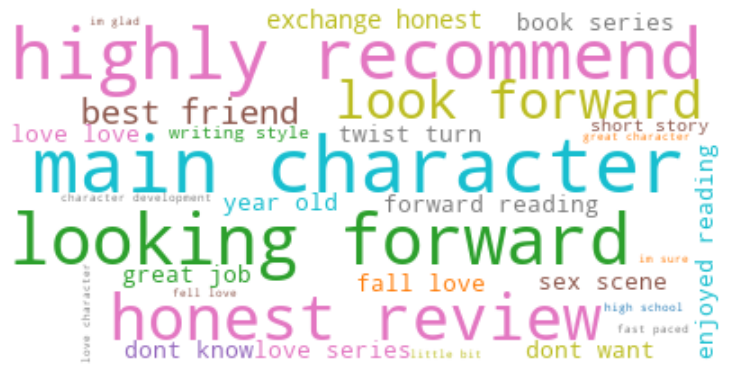

In [59]:
# import word cloud library and plot !
from wordcloud import WordCloud

wordcloud = WordCloud(colormap='tab10',background_color='white').generate_from_frequencies(BOW)
plt.figure(figsize=(10,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# TOPIC MODELING

In [22]:
# Required Packages
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# LDA model
# Creat the term dictionary of the corpus where every unique term is assigned an index 
dictionary = corpora.Dictionary(df['reviewText_lemmatized'])

In [24]:
# Convert the list of reviews (reviewText_lemmatized) into a Document Term Matrix using the dictionary 
dtm = [dictionary.doc2bow(rev) for rev in df['reviewText_lemmatized']]

In [26]:
# Create the object for LDA model using the gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=dtm, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)

KeyboardInterrupt: 

In [ ]:
# print out topics
lda_model.print_topics()

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis